Phase-2 Challa Venkata Raghava Reddy(AM.EN.U4CSE17506)

Data Preprocessing

In [1]:
import pandas as pd 
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import RepeatedKFold
from sklearn.linear_model import LogisticRegression
from sklearn import svm
import matplotlib.pyplot as plt


In [2]:
data = pd.read_csv('fdata.csv')
data.describe()

,chroma_stft,rmse,spectral_centroid,spectral_bandwidth,rolloff,zero_crossing_rate,mfcc1,mfcc2,mfcc3,mfcc4,...,mfcc11,mfcc12,mfcc13,mfcc14,mfcc15,mfcc16,mfcc17,mfcc18,mfcc19,mfcc20
count,2253.000000,2253.000000,2253.000000,2253.000000,2253.000000,2253.000000,2253.000000,2253.000000,2253.000000,2253.000000,...,2253.000000,2253.000000,2253.000000,2253.000000,2253.000000,2253.000000,2253.000000,2253.000000,2253.000000,2253.000000
mean,0.398261,0.182655,2253.240990,2412.788845,4786.240981,0.099300,-95.350405,93.234543,3.180337,29.969730,...,-3.000571,3.566554,-3.272050,1.695272,-3.608310,1.987763,-4.959487,1.503436,-3.475424,0.444395
std,0.067704,0.069445,575.905443,358.525522,1227.658555,0.037528,78.892086,26.072126,18.563118,11.858267,...,5.234076,4.634705,4.778654,4.277236,4.194486,4.189078,4.002450,3.719920,3.858484,3.943404
min,0.196276,0.020729,408.323032,517.150538,623.445769,0.016846,-514.132300,22.072756,-91.221390,-39.216022,...,-32.792435,-15.513402,-33.918747,-18.316100,-19.641539,-13.582519,-20.893114,-14.965501,-22.041351,-22.211124
25%,0.353577,0.130321,1885.238833,2241.329341,4073.223680,0.072378,-141.782380,76.029850,-9.005164,22.872723,...,-5.918273,0.770960,-6.074555,-0.812800,-6.113290,-0.583220,-7.371390,-0.735274,-5.832087,-2.000330
50%,0.402700,0.183613,2288.810240,2456.737163,4897.637743,0.096127,-86.119060,90.838844,3.007377,29.965761,...,-2.653530,3.826097,-3.138969,1.871515,-3.459018,2.125868,-5.042531,1.591153,-3.456106,0.623038
75%,0.443067,0.230546,2625.317658,2640.072834,5611.954621,0.122646,-39.258070,108.255680,14.930601,37.065273,...,0.449232,6.506954,-0.229908,4.402675,-0.915010,4.928226,-2.501780,3.852726,-0.914963,3.034174
max,0.638385,0.467611,4065.463745,3207.019225,7878.497905,0.270357,86.573350,229.162580,77.668670,87.347565,...,14.776793,21.007347,16.919920,23.755932,13.283786,15.498725,13.359570,20.667809,18.525902,16.323227


In [3]:
data=data.drop(['filename'],axis=1)
data.head()

,chroma_stft,rmse,spectral_centroid,spectral_bandwidth,rolloff,zero_crossing_rate,mfcc1,mfcc2,mfcc3,mfcc4,...,mfcc12,mfcc13,mfcc14,mfcc15,mfcc16,mfcc17,mfcc18,mfcc19,mfcc20,label
0,0.383955,0.178037,2475.384255,2692.025039,5581.391365,0.103673,-46.365340,83.86241,7.264887,29.455942,...,-0.663498,-11.002799,-1.197551,-3.334102,-0.537420,-6.944205,-3.001334,-7.972998,-5.372086,alternative
1,0.402224,0.155784,2603.162978,2970.712522,6172.735793,0.098682,-104.715960,79.76266,34.896862,26.846367,...,-0.199909,-11.291385,-3.149277,-1.415129,-1.934461,-9.952145,2.418224,-14.083698,-5.242075,alternative
2,0.410419,0.266153,2528.395250,2581.397083,5443.013247,0.119591,11.476575,81.72015,-5.599661,33.353157,...,7.260674,-1.591810,-0.206867,-1.741824,5.232390,-7.532840,1.387093,-2.171635,0.422233,alternative
3,0.457951,0.148688,2525.560859,2540.915127,5459.560074,0.125657,-90.255260,75.02876,-4.430025,37.837990,...,7.583189,-2.893079,3.362226,-0.267539,-1.483779,-5.688086,0.288416,-4.855022,1.248333,alternative
4,0.311643,0.208481,2340.010344,2537.745447,5248.916724,0.073638,-86.119060,82.10048,-9.278212,18.671814,...,-2.292835,-12.341735,-6.247082,-13.808282,-9.181357,-7.140655,2.653370,3.366806,10.193027,alternative


In [4]:
genre_list = data.iloc[:,-1]
encoder = LabelEncoder()
y = encoder.fit_transform(genre_list)
scalar = StandardScaler()
x  =scalar.fit_transform(np.array(data.iloc[:,:-1],dtype = float))
print(x)

[[-0.21134493 -0.06652217  0.38581435 ... -1.21125477 -1.16589096
  -1.47531748]
 [ 0.05854305 -0.38703469  0.60773809 ...  0.24597051 -2.74994733
  -1.44234103]
 [ 0.17962161  1.20262577  0.47788287 ... -0.03128251  0.33797681
  -0.0056214 ]
 ...
 [ 0.09818177  1.87586465  0.73204913 ...  0.49074923  0.78814667
  -0.43491874]
 [ 0.42476415  1.44815099 -0.29054286 ...  0.48101485  0.70781831
   0.79707011]
 [ 0.4230686   1.37840109  0.36692202 ...  0.24112804  0.05184114
   0.00406905]]


In [5]:
X,X_new,Y,Y_new = train_test_split(x,y,test_size=0.2,random_state=1)

Logistic Regression using K-Fold

In [6]:
def func(model):
    rkf = RepeatedKFold(n_splits=24, n_repeats=2, random_state=1)
    my_score=[]
    for train_index, test_index in rkf.split(X):
         X_train, X_test = X[train_index], X[test_index] 
         y_train, y_test = Y[train_index], Y[test_index]
         model.fit(X_train,y_train)
         my_score.append(model.score(X_test,y_test))
    return my_score

Text(0, 0.5, 'accuracy')

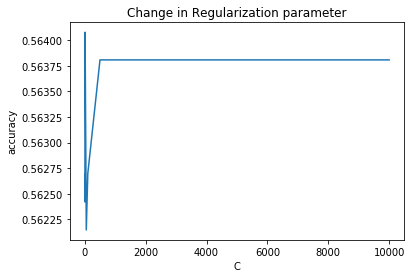

In [10]:
c = [1,5,10,50,100,500,1000,5000,10000]
logacc=[]
for i in c:
    model = LogisticRegression(solver = 'liblinear',random_state=0,C=i,penalty='l2',multi_class='ovr')
    my_score=func(model)
    logacc.append(np.mean(my_score))
plt.plot(c,logacc)
plt.title("Change in Regularization parameter")
plt.xlabel("C")
plt.ylabel("accuracy")

In [8]:
model = LogisticRegression(solver = 'liblinear',random_state=0,C=1,penalty='l2',multi_class='ovr')
my_score=func(model)

In [9]:
print("Accuracy of the testing set in Logistic Regression:",model.score(X_new,Y_new))

Accuracy of the testing set in Logistic Regression: 0.5565410199556541


[0.2894736842105263, 0.2894736842105263, 0.36, 0.3466666666666667, 0.26666666666666666, 0.25333333333333335, 0.3333333333333333, 0.29333333333333333, 0.28, 0.25333333333333335, 0.28, 0.28, 0.3333333333333333, 0.36, 0.30666666666666664, 0.29333333333333333, 0.36, 0.3466666666666667, 0.30666666666666664, 0.14666666666666667, 0.4, 0.24, 0.24, 0.24, 0.32894736842105265, 0.2236842105263158, 0.26666666666666666, 0.28, 0.21333333333333335, 0.3333333333333333, 0.22666666666666666, 0.30666666666666664, 0.3333333333333333, 0.29333333333333333, 0.25333333333333335, 0.3466666666666667, 0.24, 0.22666666666666666, 0.32, 0.36, 0.3333333333333333, 0.28, 0.28, 0.36, 0.30666666666666664, 0.3466666666666667, 0.32, 0.32]
[0.2894736842105263, 0.32894736842105265, 0.4, 0.3466666666666667, 0.28, 0.30666666666666664, 0.37333333333333335, 0.29333333333333333, 0.32, 0.28, 0.28, 0.28, 0.3333333333333333, 0.38666666666666666, 0.3333333333333333, 0.30666666666666664, 0.38666666666666666, 0.37333333333333335, 0.32,

Text(0, 0.5, 'accuracy')

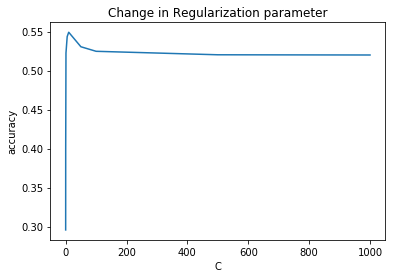

In [13]:
c = [0.001,0.01,0.1,1,5,10,50,100,500,1000]
svmacc=[]
for i in c:
    clf = svm.SVC(kernel = 'poly',C=i)
    my_score=logistfunc(clf)
    svmacc.append(np.mean(my_score))
    print(my_score)
plt.plot(c,svmacc)
plt.title("Change in Regularization parameter")
plt.xlabel("C")
plt.ylabel("accuracy")

In [20]:
clf = svm.SVC(kernel = 'poly',C=11)
func(clf)
print("Accuracy of the testing set in SVM:",clf.score(X_new,Y_new))

Accuracy of the testing set in SVM: 0.5609756097560976


KNN

In [21]:
import math
def edist(x1,x2):
    dist = 0.0
    for i in range(len(x1)-1):
        dist+=(x1[i]-x2[i])**2
    return math.sqrt(dist)

In [22]:
def get_neighbour(train,test_row, k):
    distance = list()
    for row in train:
        dist = edist(row[0],test_row)
        distance.append((row,dist))
    distance.sort(key=lambda tup:tup[1])
    neighbour = list()
    for i in range(k):
        neighbour.append(distance[i][0][1])
    return neighbour

In [23]:
def predict(train,test_row,k):
    neighbours = get_neighbour(train,test_row,k)
    pred = max(set(neighbours),key = neighbours.count)
    return pred

In [30]:
kx = list()
i=0
for row in X:
    kx.append((row,Y[i]))
    i+=1
y_pred2 = []
for row in X_new:
    y_pred2.append(predict(kx,row,25))

In [32]:
from sklearn.metrics import accuracy_score
print("Accuracy of the testing set in knn:",accuracy_score(y_pred2, Y_new))

Accuracy of the testing set in knn: 0.6277161862527716


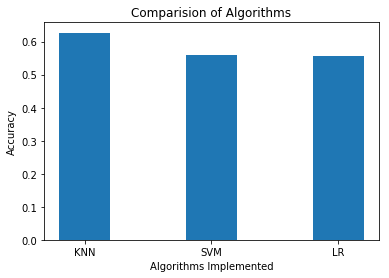

In [33]:
data = {'KNN':0.627, 'LR':0.556, 'SVM':0.56} 
courses = list(data.keys()) 
values = list(data.values()) 
plt.bar(courses, values, 
        width = 0.4) 
  
plt.xlabel("Algorithms Implemented") 
plt.ylabel("Accuracy") 
plt.title("Comparision of Algorithms") 
plt.show() 

In [37]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=9, algorithm = 'auto')
kmeans.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=9, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [40]:
prediction = kmeans.predict(X)
print(prediction)

[6 8 7 ... 3 2 0]
